In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
%config InlineBackend.figure_format='svg'

In [9]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()

In [16]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [47]:
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [58]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [57]:
y = pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
X_train_s = scaler.fit_transform(X_train)

In [68]:
X_test_s = scaler.transform(X_test)

In [70]:
X_train_s = pd.DataFrame(X_train_s, columns=boston.feature_names)

In [73]:
X_test_s = pd.DataFrame(X_test_s,  columns=boston.feature_names); X_test_s.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.002462,-0.044123,0.109307,-0.050203,-0.075497,-0.218831,0.003276,-0.030652,0.111584,0.125688,0.305805,0.021464,0.136714
std,0.841556,1.041491,0.976256,0.916046,0.923813,0.936848,1.033283,0.944640,1.067933,1.069264,0.808906,0.991129,1.020140
min,-0.406450,-0.500320,-1.528453,-0.278089,-1.399166,-3.887942,-2.230181,-1.239834,-0.974048,-1.301658,-2.389244,-3.822705,-1.348623
25%,-0.397307,-0.500320,-0.709046,-0.278089,-0.920682,-0.628927,-0.885415,-0.725479,-0.624360,-0.736787,0.036696,0.204932,-0.671661
50%,-0.383485,-0.500320,-0.057369,-0.278089,-0.208272,-0.205189,0.219725,-0.213661,-0.507797,-0.355687,0.396095,0.392842,-0.017229
75%,0.103039,-0.500320,1.033237,-0.278089,0.553050,0.230546,0.953803,0.449420,1.706891,1.578434,0.845343,0.444180,0.782946
max,4.753684,3.608000,2.433163,3.595975,2.675394,2.424744,1.124581,3.242576,1.706891,1.849573,1.653990,0.444180,3.453128


In [79]:
X_train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [74]:
from sklearn.manifold import TSNE

In [75]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [90]:
X_train_tsne = tsne.fit_transform(X_train_s)

In [91]:
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [92]:
X_train_tsne.shape

(404, 2)

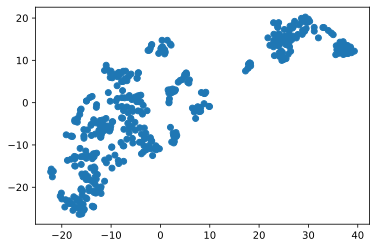

In [93]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

In [94]:
from sklearn.cluster import KMeans

In [95]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [96]:
train_labels = model.fit_predict(X_train_s)

In [97]:
train_labels

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [98]:
model.cluster_centers_

array([[-0.39886419,  1.55761113, -1.01661835, -0.09789972, -1.11157102,
         0.4694394 , -1.31625943,  1.43008074, -0.59047541, -0.58513831,
        -0.60269912,  0.35449756, -0.82802167],
       [ 0.81090356, -0.50032012,  1.12900228,  0.08796453,  1.14538259,
        -0.49660815,  0.77912417, -0.85778857,  1.2424768 ,  1.31237242,
         0.60373924, -0.65731177,  0.90021762],
       [-0.35959388, -0.36865917, -0.29295347, -0.014409  , -0.26109152,
         0.1188348 ,  0.07460493, -0.07354866, -0.56028098, -0.60915918,
        -0.1300668 ,  0.277444  , -0.22574751]])

In [99]:
tsne_k = TSNE(n_components=3, learning_rate=250, random_state=42)

In [100]:
X_train_tsne_k = tsne_k.fit_transform(X_train_s)

In [101]:
X_train_tsne_k

array([[  50.335674  ,  -74.79364   ,   58.309216  ],
       [  88.586205  ,   39.88795   ,    3.8777828 ],
       [  11.051391  ,   40.39882   ,  -95.47123   ],
       ...,
       [  74.44131   ,   94.24357   ,   66.48296   ],
       [  -0.75446886, -120.41056   ,   56.32864   ],
       [ 139.25684   ,  -20.839106  ,   22.324747  ]], dtype=float32)

In [103]:
X_train_tsne_k.shape

(404, 3)

In [105]:
train_labels.shape

(404,)

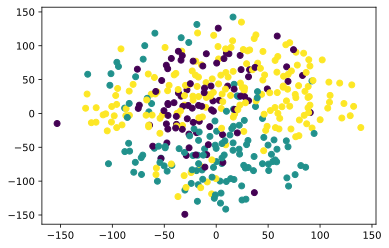

In [106]:
plt.scatter(X_train_tsne_k[:,0], X_train_tsne_k[:,1], c=train_labels)
plt.show()

In [40]:
type(np.where(boston.feature_names == 'CRIM'))

tuple

In [43]:
list(boston.feature_names).index('CRIM')

0

In [45]:
#boston.data[:,list(boston.feature_names).index('CRIM')]

In [117]:
type(X_train)

pandas.core.frame.DataFrame

In [150]:
#y_train[train_labels == i].mean()
type(y_train[train_labels == 1]['price'])

pandas.core.series.Series

In [152]:
for i in np.unique(train_labels):
    print(f"In cluster {i}, mean price: {y_train[train_labels == i]['price'].mean()}, mean CRIM: {X_train[train_labels == i]['CRIM'].mean()}.")

In cluster 0, mean price: 27.78837209302326, mean CRIM: 0.07356558139534884.
In cluster 1, mean price: 16.165354330708663, mean CRIM: 10.797028425196851.
In cluster 2, mean price: 24.958115183246072, mean CRIM: 0.4216602094240837.


## Задание 3

In [153]:
y_test_predict = model.predict(X_test_s)

In [154]:
y_test_predict

array([2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2])

In [156]:
for i in np.unique(y_test_predict):
    print(f"In cluster {i}, mean price: {y_test[y_test_predict == i]['price'].mean()}, mean CRIM: {X_test[y_test_predict == i]['CRIM'].mean()}.")

In cluster 0, mean price: 31.35, mean CRIM: 0.06206.
In cluster 1, mean price: 16.43714285714286, mean CRIM: 10.165531142857143.
In cluster 2, mean price: 21.860784313725492, mean CRIM: 0.2660788235294118.


In [ ]:
X = pd.DataFrame(boston.data[:,list(boston.feature_names).index('CRIM')], columns='CRIM')

In [158]:
# можно и так.
X_test['CRIM'][y_test_predict == 0].mean()

0.06206